In [160]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [161]:
exercise=pd.read_csv('exercise.csv')
exercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [162]:
exercise.shape

(15000, 8)

In [163]:
exercise.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
dtype: int64

In [164]:
exercise.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000


C:\Users\Raj\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

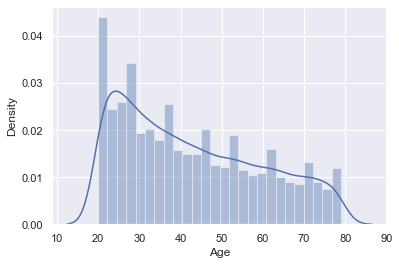

In [165]:
sns.set()
sns.distplot(exercise.Age)

In [166]:
calories=pd.read_csv('Calories.csv')
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [167]:
calories.describe()

,User_ID,Calories
count,1.500000e+04,15000.000000
mean,1.497736e+07,89.539533
std,2.872851e+06,62.456978
min,1.000116e+07,1.000000
25%,1.247419e+07,35.000000
50%,1.499728e+07,79.000000
75%,1.744928e+07,138.000000
max,1.999965e+07,314.000000


In [168]:
#concanating two dataframes 
dataset=pd.concat([exercise,calories['Calories']],axis=1)
dataset.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [169]:
dataset.Gender.value_counts()

female    7553
male      7447
Name: Gender, dtype: int64

C:\Users\Raj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

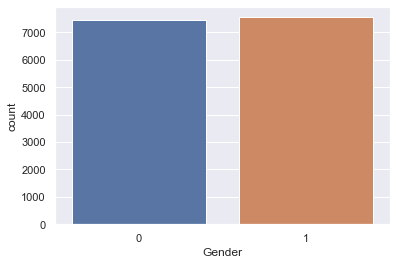

In [170]:
dataset.replace({'Gender':{'male':0,'female':1}},inplace=True)
# sns.distplot(dataset.Gender)
sns.countplot('Gender',data=dataset)

C:\Users\Raj\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Height', ylabel='Density'>

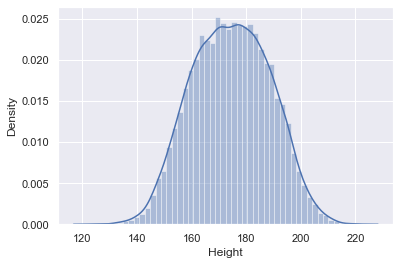

In [171]:
sns.distplot(dataset.Height)

<AxesSubplot:>

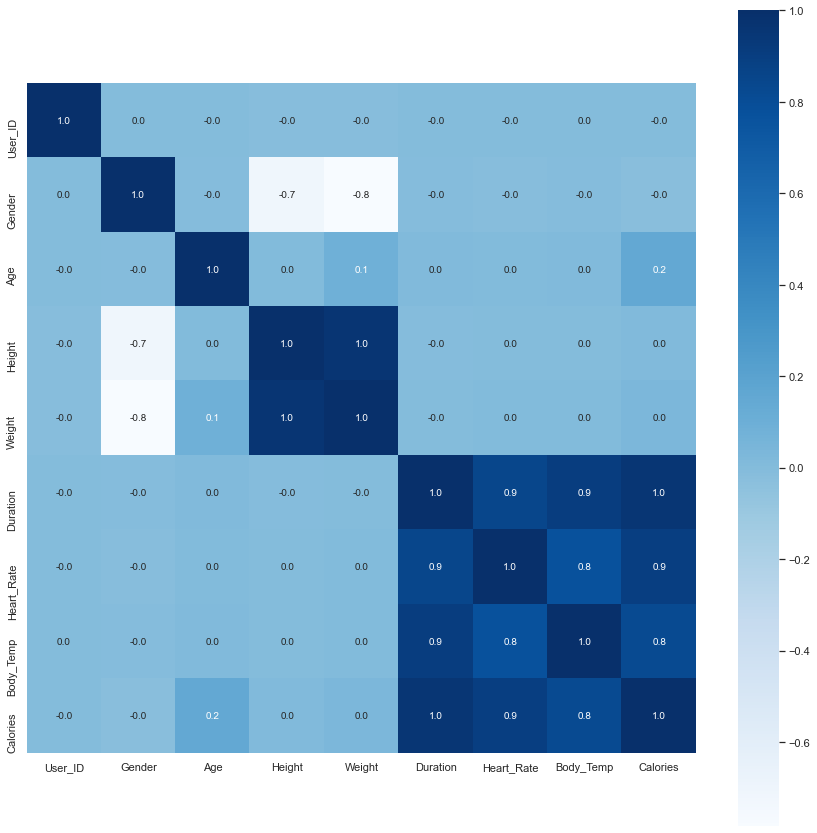

In [172]:
correlation=dataset.corr()
plt.figure(figsize=(15,15))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':10},cmap='Blues')


# according to this heatmap of correlation we can see that body_temp,heart_rate,duration ,age shows positive correaltion
# with respect to calories

C:\Users\Raj\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Body_Temp', ylabel='Density'>

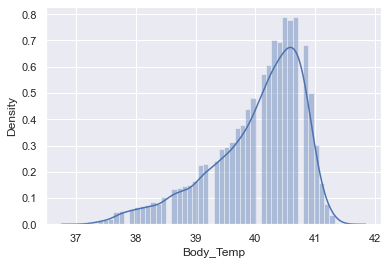

In [173]:
sns.distplot(dataset.Body_Temp)

In [174]:
dataset.drop(['User_ID','Gender'],axis=1)

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
dataset.iloc[:,0:7]=sc.fit_transform(dataset.iloc[:,0:7])

In [175]:
x=dataset.drop('Calories',axis=1)
y=dataset['Calories']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=3)
print(x_train.shape)

(12000, 8)


In [176]:
# loading the model
model = XGBRegressor()
# training the model with X_train
model.fit(x_train, y_train)
test_data_prediction = model.predict(x_test)
print(test_data_prediction)
mae = metrics.mean_absolute_error(y_test, test_data_prediction)
print("Mean Absolute Error = ", mae)
r2_score_result=r2_score(y_test,test_data_prediction)
print("the r2 result is ",r2_score_result)

[178.58406  101.37666   58.884666 ...  61.950153  21.792618  99.09699 ]
Mean Absolute Error =  1.5773039997182787
the r2 result is  0.9986762838608616


In [177]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)
y_pred=regressor.predict(x_test)
r2_score_result=r2_score(y_test,y_pred)
print("the r2 result is ",r2_score_result)

the r2 result is  0.9646016075488371


In [178]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor=LinearRegression()
regressor.fit(x_train,y_train)
y_pred=regressor.predict(x_test)
r2_score_result=r2_score(y_test,y_pred)
print("the r2 result is ",r2_score_result)

the r2 result is  0.9646016075488371


In [179]:
# AMONG THE THREE REGRESSION TECHNIQUES ,THE RESULT WITH GREAT PREDICTION IS GIVEN BY XGRBOOST REGRESSION. WHICH IS 
# 99%
